In [1]:
!pip install ucimlrepo


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
df = pd.concat([X, y], axis=1)
df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [3]:
df['Diagnosis'].value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

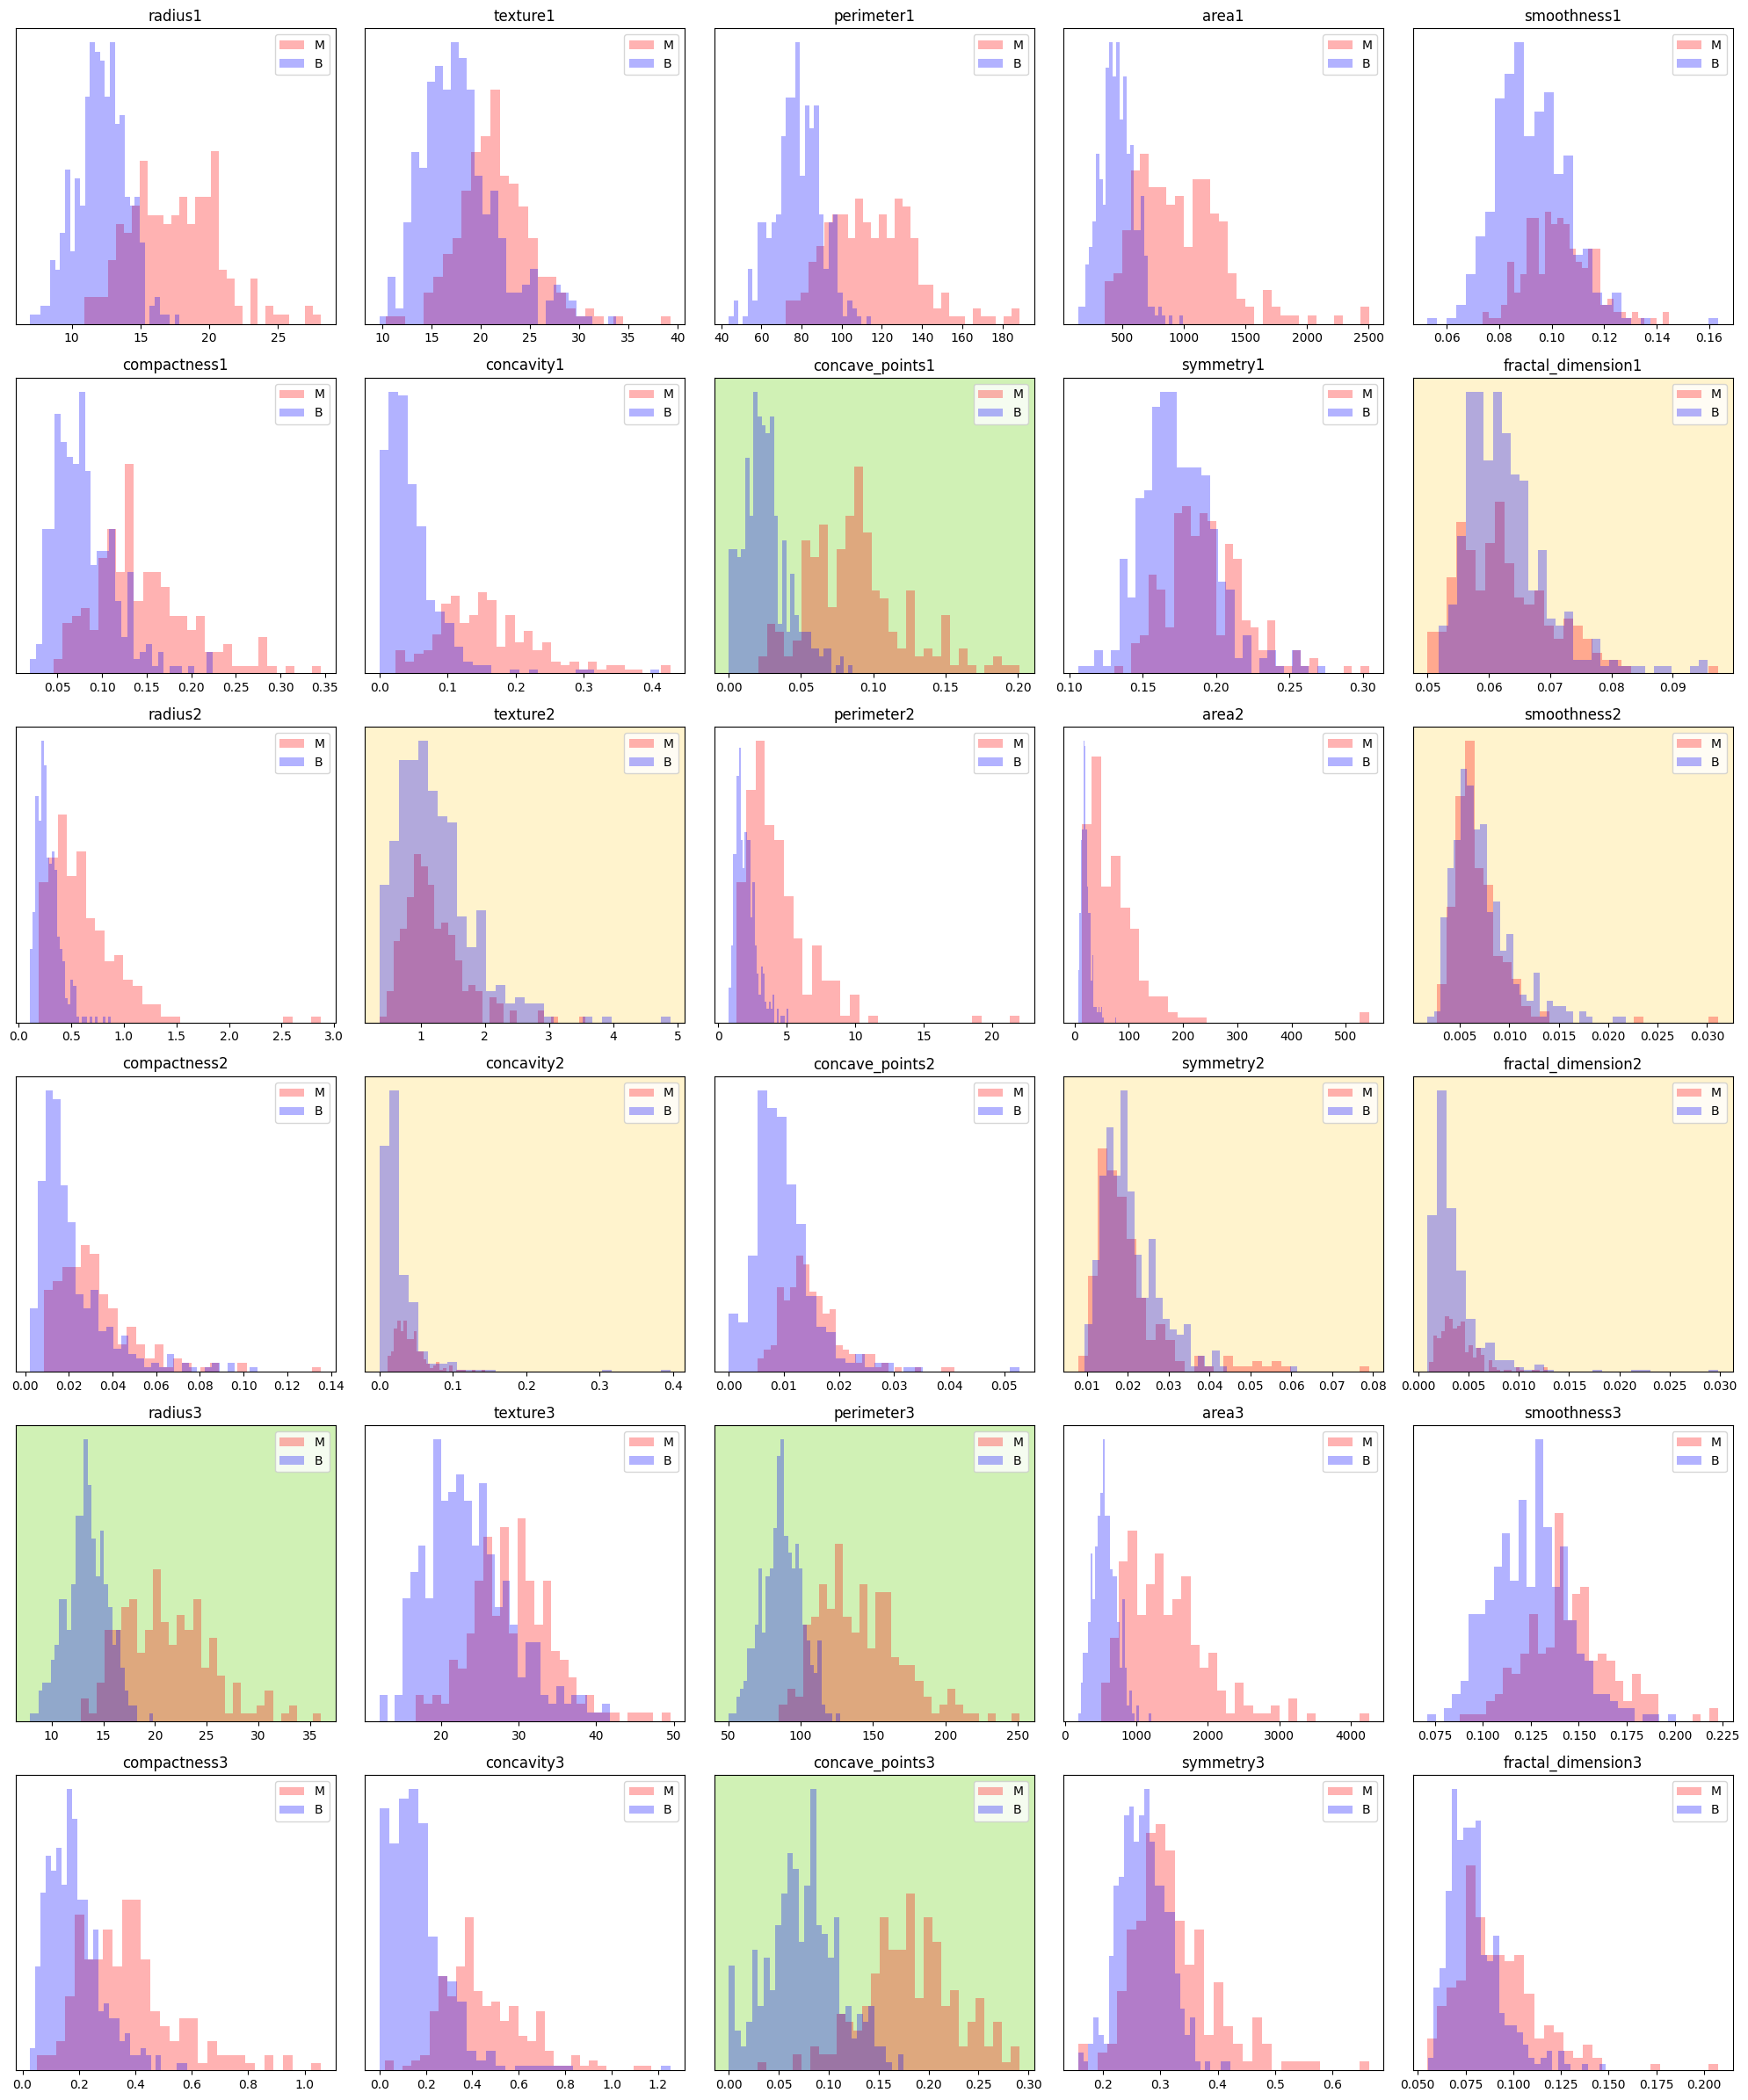

In [5]:
features = df.columns.drop('Diagnosis')
diagnosis_colors = {'M': 'red', 'B': 'blue'}
diff_thresh_coeff_L = 0.3
diff_thresh_coeff_U = 1.2
goated_features = []
mid_features = []

n_cols = 5
n_rows = int(np.ceil(len(features) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()

for idx, feature in enumerate(features):
    ax = axes[idx]
    for diag, color in diagnosis_colors.items():
        values = df[df['Diagnosis'] == diag][feature]
        ax.hist(values, bins=30, alpha=0.3, color=color, label=diag)
    ax.set_title(feature)
    ax.set_yticks([])
    ax.legend()
    # Check for overlap by comparing the means and standard deviations of the two distributions
    mean_diff = abs(df[df['Diagnosis'] == 'M'][feature].mean() - df[df['Diagnosis'] == 'B'][feature].mean())
    std_sum = df[df['Diagnosis'] == 'M'][feature].std() + df[df['Diagnosis'] == 'B'][feature].std()
    if mean_diff < diff_thresh_coeff_L * std_sum:
        ax.set_facecolor('#fff3cd')  # highlight yellow if too much overlap
        mid_features.append(feature)
    if mean_diff > diff_thresh_coeff_U * std_sum:
        ax.set_facecolor("#d0f1b5")  # highlight green if very good seperation
        goated_features.append(feature)
for idx in range(len(features), len(axes)):
    axes[idx].axis('off')
plt.tight_layout()
plt.show()

In [8]:
print("Goated features (very good separation):")
print(goated_features)

print()

print("Mid features (too much overlap):")
print(mid_features)

Goated features (very good separation):
['concave_points1', 'radius3', 'perimeter3', 'concave_points3']

Mid features (too much overlap):
['fractal_dimension1', 'texture2', 'smoothness2', 'concavity2', 'symmetry2', 'fractal_dimension2']
